In [405]:
# opem pdf file
import PyPDF2
import re
import pandas as pd
import matplotlib.pyplot as plt

**Funcões de extração de dados**

In [406]:
def  get_text(interval):
    text = ''
    page_number_pattern = r'\s*\n\s*\d+\s*\n\s*'

    for page in  interval:
        page = page.extract_text()
        page = re.sub(page_number_pattern, '\n', page)
        text = text + page.replace('\n', ' ').replace('\r', ' ')
    return text

def process_text(text,start, end):
    lines = re.split(r' / ', text[text.find(start)+len(start):text.find(end)])
    candidatos = [line.strip().replace('\n','').split(',') for line in lines]
    return candidatos

In [407]:
with open('ED_3_SERPRO_RES_FIN_OBJ_CONV_PRAT.PDF', 'rb') as pdf_file:
    pdfReader = PyPDF2.PdfReader(pdf_file)
    geral = get_text(pdfReader.pages[:66]) #Da pagina inicial até a pagina 65
    cotas_especiais = get_text(pdfReader.pages[64:74]) #Da pagina 65 até a pagina 73
    cotas_raciais = get_text(pdfReader.pages[72:]) # Da pagina 73 até o final+

In [408]:
delimitador_inicio = 'objetivas.'
delimitador_fim_geral = '1.1.1'
delimitador_fim_cotas_especiais = '1.1.2' #pagina 73
delimitador_fim_cotas_raciais = '2 DA PROVA' #pagina 73

candidatos_gerais = process_text(geral,delimitador_inicio,delimitador_fim_geral)
candidatos_cotas_especiais = process_text(cotas_especiais,delimitador_inicio,delimitador_fim_cotas_especiais)
candidatos_cotas_raciais = process_text(cotas_raciais,delimitador_inicio,delimitador_fim_cotas_raciais)



In [409]:
header = ['número de inscrição',
        'nome do candidato',
        'nota final Língua Portuguesa',
        'número de acertos Língua Portuguesa',
        'nota final Língua Inglesa',
        'número de acertos  Língua Inglesa',
        'nota final Noções de Estatística/Probabilidade',
        'número de acertos na disciplina de Noções de Estatística/Probabilidade',
        'nota final disciplina de Raciocínio Lógico',
        'número de acertos na disciplina de Raciocínio Lógico',
        'nota final disciplina de Legislação',
        'número de acertos na disciplina de Legislação',
        'nota final na prova objetiva de conhecimentos básicos (P1)',
        'número de acertos na prova objetiva de conhecimentos básicos (P1)', 
        'nota final na prova de conhecimentos específicos (P2)',
        'número de acertos na prova de conhecimentos específicos (P2) ', 
        'nota final nas provas objetivas']



In [410]:
df_candidatos_gerais = pd.DataFrame(candidatos_gerais, columns = header)
df_candidatos_cotas_especiais = pd.DataFrame(candidatos_cotas_especiais, columns = header)
df_candidatos_cotas_raciais = pd.DataFrame(candidatos_cotas_raciais, columns = header)


In [411]:
df_candidatos_cotas_raciais

,número de inscrição,nome do candidato,nota final Língua Portuguesa,número de acertos Língua Portuguesa,nota final Língua Inglesa,número de acertos Língua Inglesa,nota final Noções de Estatística/Probabilidade,número de acertos na disciplina de Noções de Estatística/Probabilidade,nota final disciplina de Raciocínio Lógico,número de acertos na disciplina de Raciocínio Lógico,nota final disciplina de Legislação,número de acertos na disciplina de Legislação,nota final na prova objetiva de conhecimentos básicos (P1),número de acertos na prova objetiva de conhecimentos básicos (P1),nota final na prova de conhecimentos específicos (P2),número de acertos na prova de conhecimentos específicos (P2),nota final nas provas objetivas
0,10000936,Adam de Medeiros Lima,10.00,14,10.00,11,-3.00,1,4.00,7,1.00,3,22.00,36,34.00,52,56
1,10018799,Adamor Henner Silva Candido,8.00,13,6.00,9,1.00,2,4.00,6,4.00,4,23.00,34,24.00,44,47
2,10016051,Adilma Barbosa da Silva Brito,16.00,17,1.00,1,0.00,0,2.00,4,5.00,5,24.00,27,31.00,39,55
3,10020774,Adilson da Silva Santana,10.00,14,6.00,9,-1.00,2,6.00,8,3.00,4,24.00,37,22.00,46,46
4,10012457,Adilson Souza Marques,12.00,15,11.00,11,0.00,1,3.00,5,0.00,1,26.00,33,31.00,42,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,10028504,Wi lson Luiz da Silva Farias,13.00,15,7.00,9,0.00,0,3.00,4,3.00,3,26.00,31,30.00,41,56
791,10025956,Yan Zenith de Lucena Rodrigues,8.00,13,12.00,12,-1.00,2,2.00,6,1.00,3,22.00,36,26.00,48,48
792,10011741,Yanisley Mora Ritchie,10.0 0,14,11.00,11,1.00,1,1.00,5,5.00,5,28.00,36,31.00,49,59
793,10003490,Yuri Matheus Barboza de Oliveira,12.00,15,12.00,12,-1.00,2,8.00,9,1.00,3,32.00,41,37.00,52,69


**Conferindo se o Extrator funcionou corretamente**

In [412]:
df_candidatos_gerais.tail(1)

,número de inscrição,nome do candidato,nota final Língua Portuguesa,número de acertos Língua Portuguesa,nota final Língua Inglesa,número de acertos Língua Inglesa,nota final Noções de Estatística/Probabilidade,número de acertos na disciplina de Noções de Estatística/Probabilidade,nota final disciplina de Raciocínio Lógico,número de acertos na disciplina de Raciocínio Lógico,nota final disciplina de Legislação,número de acertos na disciplina de Legislação,nota final na prova objetiva de conhecimentos básicos (P1),número de acertos na prova objetiva de conhecimentos básicos (P1),nota final na prova de conhecimentos específicos (P2),número de acertos na prova de conhecimentos específicos (P2),nota final nas provas objetivas
2810,10019316,Yvan Pereira dos Santos Brito,14.00,16,8.00,10,3.00,4,8.00,9,5.00,5,38.00,44,35.00,52,73.


In [413]:
df_candidatos_cotas_especiais.tail(1)

,número de inscrição,nome do candidato,nota final Língua Portuguesa,número de acertos Língua Portuguesa,nota final Língua Inglesa,número de acertos Língua Inglesa,nota final Noções de Estatística/Probabilidade,número de acertos na disciplina de Noções de Estatística/Probabilidade,nota final disciplina de Raciocínio Lógico,número de acertos na disciplina de Raciocínio Lógico,nota final disciplina de Legislação,número de acertos na disciplina de Legislação,nota final na prova objetiva de conhecimentos básicos (P1),número de acertos na prova objetiva de conhecimentos básicos (P1),nota final na prova de conhecimentos específicos (P2),número de acertos na prova de conhecimentos específicos (P2),nota final nas provas objetivas
311,10015393,Yuri Mendes Kazzaz,4.00,11,1.00,1,0.00,0,0.00,4,5.00,5,10.00,21,16.00,39,26.


In [414]:
df_candidatos_cotas_raciais.tail(1)

,número de inscrição,nome do candidato,nota final Língua Portuguesa,número de acertos Língua Portuguesa,nota final Língua Inglesa,número de acertos Língua Inglesa,nota final Noções de Estatística/Probabilidade,número de acertos na disciplina de Noções de Estatística/Probabilidade,nota final disciplina de Raciocínio Lógico,número de acertos na disciplina de Raciocínio Lógico,nota final disciplina de Legislação,número de acertos na disciplina de Legislação,nota final na prova objetiva de conhecimentos básicos (P1),número de acertos na prova objetiva de conhecimentos básicos (P1),nota final na prova de conhecimentos específicos (P2),número de acertos na prova de conhecimentos específicos (P2),nota final nas provas objetivas
794,10020676,Yuri Tadeu de Souza Carvalho,8.00,13,8.00,10,3.0 0,4,4.00,7,1.00,3,24.00,37,40.00,55,64.


**De Acordo com o Paragrafo 10.1 do Edital A nota final no concurso (NFC) será calculada de acordo com a seguinte fórmula:**
	NFC = N1 + (2 x N2) + N3
	em que:

 1. N1 = nota final obtida na prova objetiva P1;
 2.  N2 = nota final obtida na prova objetiva P2;
 3. ~~c) N3 = nota final obtida na prova de    conhecimentos aplicados P3.~~ Será realizada posteriormente

In [415]:
df_candidatos_gerais['nota final na prova objetiva de conhecimentos básicos (P1)'] = df_candidatos_gerais['nota final na prova objetiva de conhecimentos básicos (P1)'].str.replace(' ','').astype(float)
df_candidatos_gerais['nota final na prova de conhecimentos específicos (P2)'] = df_candidatos_gerais['nota final na prova de conhecimentos específicos (P2)'].str.replace(' ','').astype(float)
df_candidatos_gerais['nota final nas provas objetivas'] = df_candidatos_gerais['nota final nas provas objetivas'].str.replace(' ','').astype(float).astype(float)
df_candidatos_gerais['Nota Final Primeira Etapa'] = df_candidatos_gerais['nota final na prova objetiva de conhecimentos básicos (P1)'] + df_candidatos_gerais['nota final na prova de conhecimentos específicos (P2)']*2

In [416]:
df_candidatos_cotas_especiais['nota final na prova objetiva de conhecimentos básicos (P1)'] = df_candidatos_cotas_especiais['nota final na prova objetiva de conhecimentos básicos (P1)'].str.replace(' ','').astype(float)
df_candidatos_cotas_especiais['nota final na prova de conhecimentos específicos (P2)'] = df_candidatos_cotas_especiais['nota final na prova de conhecimentos específicos (P2)'].str.replace(' ','').astype(float)
df_candidatos_cotas_especiais['nota final nas provas objetivas'] = df_candidatos_cotas_especiais['nota final nas provas objetivas'].str.replace(' ','').astype(float).astype(float)
df_candidatos_cotas_especiais['Nota Final Primeira Etapa'] = df_candidatos_cotas_especiais['nota final na prova objetiva de conhecimentos básicos (P1)'] + df_candidatos_gerais['nota final na prova de conhecimentos específicos (P2)']*2

In [417]:
df_candidatos_cotas_raciais['nota final na prova objetiva de conhecimentos básicos (P1)'] = df_candidatos_cotas_raciais['nota final na prova objetiva de conhecimentos básicos (P1)'].str.replace(' ','').astype(float)
df_candidatos_cotas_raciais['nota final na prova de conhecimentos específicos (P2)'] = df_candidatos_cotas_raciais['nota final na prova de conhecimentos específicos (P2)'].str.replace(' ','').astype(float)
df_candidatos_cotas_raciais['nota final nas provas objetivas'] = df_candidatos_cotas_raciais['nota final nas provas objetivas'].str.replace(' ','').astype(float).astype(float)
df_candidatos_cotas_raciais['Nota Final Primeira Etapa'] = df_candidatos_cotas_raciais['nota final na prova objetiva de conhecimentos básicos (P1)'] + df_candidatos_cotas_raciais['nota final na prova de conhecimentos específicos (P2)']*2
df_candidatos_cotas_raciais.sort_values(by=['Nota Final Primeira Etapa'], ascending=False, inplace=True)


**Criterios de desempate Considerados de Acordo com o Edital**

 1. obtiver a maior nota na prova objetiva de Conhecimentos Específicos
    P2;
   
    
 2. obtiver o maior número de acertos na prova objetiva de Conhecimentos
    Específicos P2;
        
    
 3.  obtiver o maior número de acertos na prova objetiva de
    Conhecimentos Básicos P1;


In [418]:
desempate_criterio = ['Nota Final Primeira Etapa','nota final na prova de conhecimentos específicos (P2)','nota final na prova objetiva de conhecimentos básicos (P1)']

In [419]:
df_candidatos_gerais

,número de inscrição,nome do candidato,nota final Língua Portuguesa,número de acertos Língua Portuguesa,nota final Língua Inglesa,número de acertos Língua Inglesa,nota final Noções de Estatística/Probabilidade,número de acertos na disciplina de Noções de Estatística/Probabilidade,nota final disciplina de Raciocínio Lógico,número de acertos na disciplina de Raciocínio Lógico,nota final disciplina de Legislação,número de acertos na disciplina de Legislação,nota final na prova objetiva de conhecimentos básicos (P1),número de acertos na prova objetiva de conhecimentos básicos (P1),nota final na prova de conhecimentos específicos (P2),número de acertos na prova de conhecimentos específicos (P2),nota final nas provas objetivas,Nota Final Primeira Etapa
0,10005745,Abel Pinheiro de Figueiredo,9.00,13,12.00,12,4.00,4,5.00,7,4.00,4,34.0,40,26.0,43,60.0,86.0
1,10024989,Abilio Nehme,15.00,16,6.00,7,0.00,1,2.00,4,1.00,2,24.0,30,35.0,42,59.0,94.0
2,10003790,Abimael Carlos da Costa,14.00,15,9.00,10,0.00,0,1.00,3,2.00,3,26.0,31,36.0,46,62.0,98.0
3,10029156,Abraao Alipio Silva da Silveira,11.00,14,7.00,9,-2.00,0,6.00,8,5.00,5,27.0,36,32.0,43,59.0,91.0
4,10001927,Abraao Gomes Farah,12.00,15,8.00,10,0.00,0,4.00,6,5.0 0,5,29.0,36,35.0,49,64.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2806,10022969,Yuri Costa do s Santos,16.00,17,12.00,12,0.00,1,6.00,8,3.00,3,37.0,41,37.0,38,74.0,111.0
2807,10003490,Yuri Matheus Barboza de Oliveira,12.00,15,12.00,12,-1.00,2,8.00,9,1.00,3,32.0,41,37.0,52,69.0,106.0
2808,10004021,Yuri Rodrigues de Alencar Lopes,16.00,17,12.00,12,-1.00,2,4.00,7,5.00,5,36.0,43,28.0,49,64.0,92.0
2809,10020676,Yuri Tadeu de Souza Carvalho,8.00,13,8.00,10,3.00,4,4.00,7,1.00,3,24.0,37,40.0,55,64.0,104.0


In [420]:
df_candidatos_gerais.sort_values(by=desempate_criterio, ascending=False, inplace=True)
df_candidatos_cotas_especiais.sort_values(by=desempate_criterio, ascending=False, inplace=True)
df_candidatos_cotas_raciais.sort_values(by=desempate_criterio, ascending=False, inplace=True)

In [421]:
df_candidatos_gerais.to_excel('candidatos_gerais_ordenado.xlsx', index=False)
df_candidatos_cotas_especiais.to_excel('candidatos_cotas_especiais__ordenado.xlsx', index=False)
df_candidatos_cotas_raciais.to_excel('candidatos_cotas_raciais_ordenado.xlsx', index=False)

In [422]:
df_candidatos_gerais.describe()

,nota final na prova objetiva de conhecimentos básicos (P1),nota final na prova de conhecimentos específicos (P2),nota final nas provas objetivas,Nota Final Primeira Etapa
count,2811.000000,2811.000000,2811.000000,2811.000000
mean,29.741017,34.078620,63.819637,97.898257
std,5.545845,5.973537,7.055740,11.839630
min,10.000000,16.000000,56.000000,72.000000
25%,26.000000,30.000000,58.000000,89.000000
50%,30.000000,34.000000,62.000000,96.000000
75%,34.000000,38.000000,67.000000,104.000000
max,48.000000,58.000000,97.000000,150.000000


In [423]:
df_candidatos_cotas_especiais.describe()

,nota final na prova objetiva de conhecimentos básicos (P1),nota final na prova de conhecimentos específicos (P2),nota final nas provas objetivas,Nota Final Primeira Etapa
count,312.000000,312.000000,312.000000,312.000000
mean,19.006410,23.740385,42.746795,87.391026
std,7.646529,6.507965,11.789007,13.341459
min,5.000000,14.000000,20.000000,50.000000
25%,13.000000,19.000000,33.000000,78.000000
50%,18.000000,22.500000,42.000000,86.000000
75%,24.000000,28.000000,49.000000,96.000000
max,42.000000,46.000000,86.000000,126.000000


In [424]:
df_candidatos_cotas_raciais.describe()

,nota final na prova objetiva de conhecimentos básicos (P1),nota final na prova de conhecimentos específicos (P2),nota final nas provas objetivas,Nota Final Primeira Etapa
count,795.000000,795.000000,795.000000,795.000000
mean,24.660377,30.522013,55.182390,85.704403
std,5.903752,6.095211,7.748613,12.630554
min,8.000000,15.000000,46.000000,61.000000
25%,20.000000,26.000000,49.000000,76.000000
50%,24.000000,30.000000,54.000000,84.000000
75%,28.000000,35.000000,60.000000,94.000000
max,45.000000,52.000000,92.000000,142.000000


Text(0, 0.5, 'Valor')

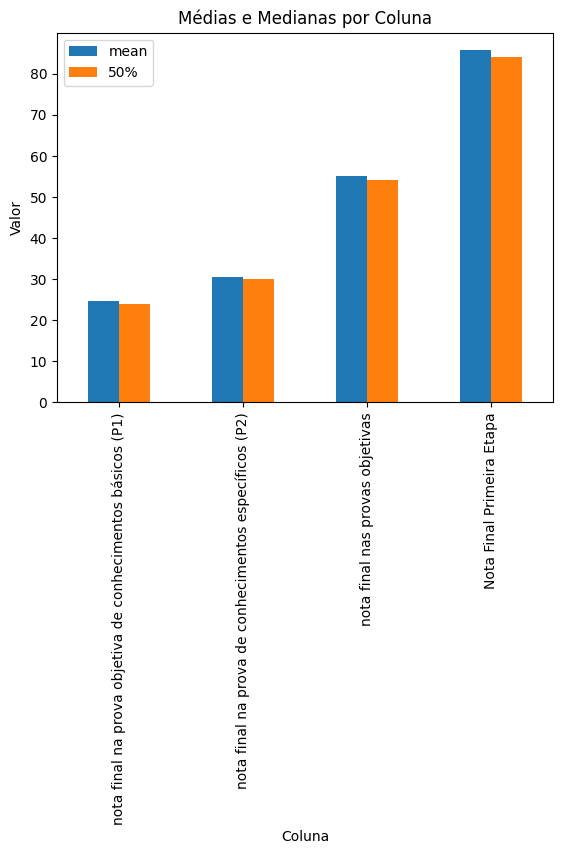

In [425]:
# Transpor o DataFrame para que as colunas se tornem linhas
df_transposto = df_candidatos_cotas_raciais.describe().transpose()
df_transposto[['mean', '50%']].plot(kind='bar')

# Adicionar título e rótulos
plt.title('Médias e Medianas por Coluna')
plt.xlabel('Coluna')
plt.ylabel('Valor')


**Grafico de Dispersão**

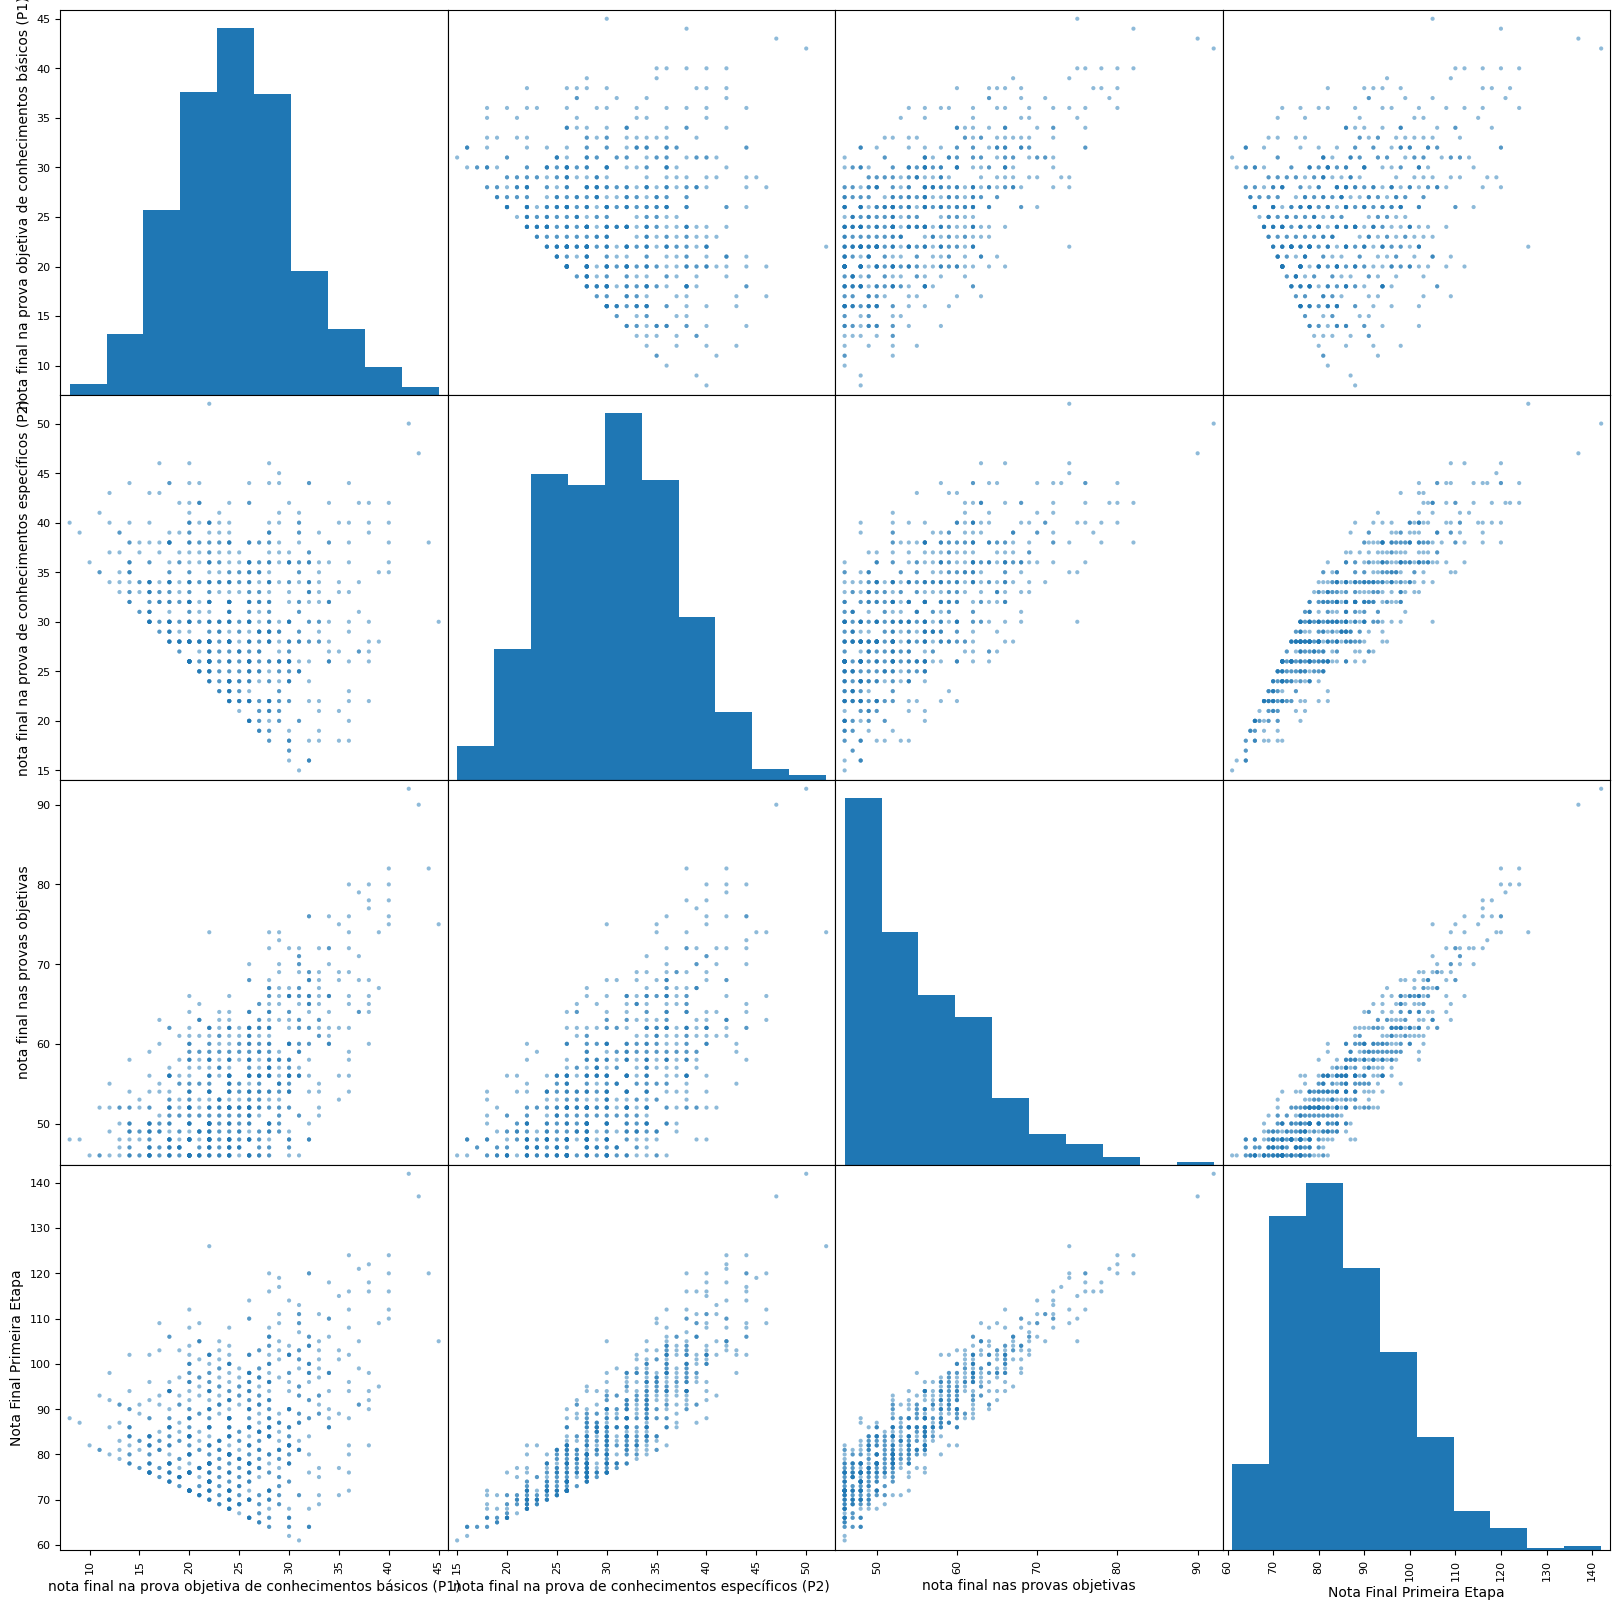

In [426]:
pd.plotting.scatter_matrix(df_candidatos_cotas_raciais, figsize=(20, 20))
plt.show()

**Analise dos candidatos de ampla concorrencia**

In [427]:

print("A maior nota foi de " + str(df_candidatos_gerais['nota final nas provas objetivas'].max()))
print("A menor nota foi de " + str(df_candidatos_gerais['nota final nas provas objetivas'].min()))
print("A media dos candidatos de ampla concorrencia foi de " + str(df_candidatos_gerais['nota final nas provas objetivas'].mean()))
print("A mediana dos candidatos de ampla concorrencia foi de " + str(df_candidatos_gerais['nota final nas provas objetivas'].median()))
print("O desvio padrao dos candidatos de ampla concorrencia foi de " + str(df_candidatos_gerais['nota final nas provas objetivas'].std()))


A maior nota foi de 97.0
A menor nota foi de 56.0
A media dos candidatos de ampla concorrencia foi de 63.819637139807895
A mediana dos candidatos de ampla concorrencia foi de 62.0
O desvio padrao dos candidatos de ampla concorrencia foi de 7.055740350718369


**Analise dos candidatos de cotas especiais**

In [428]:
print("A maior nota foi de " + str(df_candidatos_cotas_especiais['nota final nas provas objetivas'].max()))
print("A menor nota foi de " + str(df_candidatos_cotas_especiais['nota final nas provas objetivas'].min()))
print("A media dos candidatos de ampla concorrencia foi de " + str(df_candidatos_cotas_especiais['nota final nas provas objetivas'].mean()))
print("A mediana dos candidatos de ampla concorrencia foi de " + str(df_candidatos_cotas_especiais['nota final nas provas objetivas'].median()))
print("O desvio padrao dos candidatos de ampla concorrencia foi de " + str(df_candidatos_cotas_especiais['nota final nas provas objetivas'].std()))

A maior nota foi de 86.0
A menor nota foi de 20.0
A media dos candidatos de ampla concorrencia foi de 42.74679487179487
A mediana dos candidatos de ampla concorrencia foi de 42.0
O desvio padrao dos candidatos de ampla concorrencia foi de 11.789007468384261


**Analise dos candidatos de cotas raciais**

In [352]:
print("A maior nota foi de " + str(df_candidatos_cotas_raciais['nota final nas provas objetivas'].max()))
print("A menor nota foi de " + str(df_candidatos_cotas_raciais['nota final nas provas objetivas'].min()))
print("A media dos candidatos de ampla concorrencia foi de " + str(df_candidatos_cotas_raciais['nota final nas provas objetivas'].mean()))
print("A mediana dos candidatos de ampla concorrencia foi de " + str(df_candidatos_cotas_raciais['nota final nas provas objetivas'].median()))
print("O desvio padrao dos candidatos de ampla concorrencia foi de " + str(df_candidatos_cotas_raciais['nota final nas provas objetivas'].std()))

A maior nota foi de 92.0
A menor nota foi de 46.0
A media dos candidatos de ampla concorrencia foi de 55.18238993710692
A mediana dos candidatos de ampla concorrencia foi de 54.0
O desvio padrao dos candidatos de ampla concorrencia foi de 7.7486127351152545
